# CKW Open Data - Smartmeter Dataset

### Datensatz B – aggregierte Smart-Meter-Daten  
Beim Datensatz B  handelt es sich um aggregierte Verbräuche nach Gemeinden im Versorgungsgebiet. Die Aggregation wurde auf Stufe Postleitzahl angewendet und es werden zusätzlich die Anzahl der Smart Meter, welche in der Aggregation enthalten sind, in einer separaten Spalte aufgeführt.   
Damit keine Rückschlüsse auf einzelne Verbraucherinnen und Verbraucher gemacht werden können, wurden Grossverbraucherinnen und Grossverbraucher aus dem Datensatz ausgeschlossen.   

Die Daten werden als (gzip-komprimiertes) csv zum Download zur Verfügung gestellt. Zur besseren Verarbeitung wurde der Export in jeweils eine Datei pro Kalendermonat aufgeteilt. Diese Dateien können über das [CKW Open Data Portal]((https://axsa4prod4publicdata4sa.blob.core.windows.net/$web/index.html#dataset-b)) einzeln heruntergeladen werden.   

Die Spalten im csv sind:  
+ **area_code**, die Postleitzahl des Zählerstandorts (int)  
+ **timestamp**, die UTC-Zeit zu Beginn eines 15-Minuten-Zeitfensters, auf welches sich der Verbrauch bezieht (ISO-8601 timestamp)  
+ **num_meter**, die Anzahl der Smart Meter, auf welche sich der Verbrauch bezieht (int)
+ **value_kwh**, der Verbrauch in kWh im betrachteten Zeitfenster (float)

---  
Datenquelle:
+ [CKW Open Data](https://axsa4prod4publicdata4sa.blob.core.windows.net/$web/index.html#dataset-b)

---  
History:  
+ 05.03.2024 v1, dbe --- initial draft for data import, date/time conversion, data filtering and data visualization (BINA FS24 Case Study Proposal)

# Setup Environment

In [114]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print("Setup Complete")

Setup Complete


# Load Data

In [84]:
# Path of the file to read data from github repository
ckw_filepath = "https://github.com/sawubona-repo/BINA-FS24-WORK/raw/main/zDiversExamples/zData/ckw_opendata_smartmeter_dataset_b_202402.csv.gz"

# Read the file into a (pandas dataframe) variable fifa_data
# ckw_data = pd.read_csv(ckw_filepath, index_col="Date", parse_dates=True)
ckw_data = pd.read_csv(ckw_filepath, compression='gzip', header=0, sep=',', quotechar='"')

In [85]:
ckw_data.shape
ckw_data.dtypes

area_code      int64
timestamp     object
num_meter      int64
value_kwh    float64
dtype: object

In [109]:
ckw_data.head()

,area_code,timestamp,num_meter,value_kwh,DateTimeUTC,PLZ,Date,Day,Month,Year,Time,Hour,Minute,DayOfWeek
0,6122,2024-02-12T13:30:00.000Z,1101,123.30100,2024-02-12 13:30:00+00:00,6122,2024-02-12,12,2,2024,13:30:00,13,30,1
1,6106,2024-02-12T20:45:00.000Z,458,56.33200,2024-02-12 20:45:00+00:00,6106,2024-02-12,12,2,2024,20:45:00,20,45,1
2,6047,2024-02-09T09:15:00.000Z,244,69.63425,2024-02-09 09:15:00+00:00,6047,2024-02-09,9,2,2024,09:15:00,9,15,5
3,6106,2024-02-02T10:15:00.000Z,458,60.61125,2024-02-02 10:15:00+00:00,6106,2024-02-02,2,2,2024,10:15:00,10,15,5
4,6112,2024-02-13T19:45:00.000Z,400,68.90400,2024-02-13 19:45:00+00:00,6112,2024-02-13,13,2,2024,19:45:00,19,45,2


# Convert Timestamp / Add New Columns

In [86]:
ckw_data['DateTimeUTC'] = pd.to_datetime(ckw_data['timestamp'])

In [91]:
ckw_data['PLZ'] = ckw_data['area_code']

In [93]:
ckw_data['Date'] = pd.to_datetime(ckw_data['timestamp']).dt.date

In [94]:
ckw_data['Day'] = pd.to_datetime(ckw_data['timestamp']).dt.day
ckw_data['Month'] = pd.to_datetime(ckw_data['timestamp']).dt.month
ckw_data['Year'] = pd.to_datetime(ckw_data['timestamp']).dt.year

In [108]:
ckw_data['DayOfWeek'] = pd.to_datetime(ckw_data['timestamp']).dt.day_of_week+1

In [95]:
ckw_data['Time'] = pd.to_datetime(ckw_data['timestamp']).dt.time

In [96]:
ckw_data['Hour'] = pd.to_datetime(ckw_data['timestamp']).dt.hour
ckw_data['Minute'] = pd.to_datetime(ckw_data['timestamp']).dt.minute


In [97]:
ckw_data.dtypes

area_code                    int64
timestamp                   object
num_meter                    int64
value_kwh                  float64
DateTimeUTC    datetime64[ns, UTC]
PLZ                          int64
Date                        object
Day                          int64
Month                        int64
Year                         int64
Time                        object
Hour                         int64
Minute                       int64
dtype: object

# Filter and Sort Data

In [138]:
filtered_data = ckw_data.query('PLZ == 6112 and Year == 2024 and Hour == 12')
filtered_data.head(10)

,area_code,timestamp,num_meter,value_kwh,DateTimeUTC,PLZ,Date,Day,Month,Year,Time,Hour,Minute,DayOfWeek
16,6112,2024-02-18T12:00:00.000Z,400,40.938,2024-02-18 12:00:00+00:00,6112,2024-02-18,18,2,2024,12:00:00,12,0,7
1583,6112,2024-02-07T12:15:00.000Z,400,56.950,2024-02-07 12:15:00+00:00,6112,2024-02-07,7,2,2024,12:15:00,12,15,3
3945,6112,2024-02-01T12:15:00.000Z,400,56.274,2024-02-01 12:15:00+00:00,6112,2024-02-01,1,2,2024,12:15:00,12,15,4
3952,6112,2024-02-16T12:15:00.000Z,400,51.866,2024-02-16 12:15:00+00:00,6112,2024-02-16,16,2,2024,12:15:00,12,15,5
12200,6112,2024-02-13T12:45:00.000Z,400,43.389,2024-02-13 12:45:00+00:00,6112,2024-02-13,13,2,2024,12:45:00,12,45,2
14310,6112,2024-02-15T12:15:00.000Z,400,48.640,2024-02-15 12:15:00+00:00,6112,2024-02-15,15,2,2024,12:15:00,12,15,4
14321,6112,2024-02-14T12:30:00.000Z,400,50.490,2024-02-14 12:30:00+00:00,6112,2024-02-14,14,2,2024,12:30:00,12,30,3
19547,6112,2024-02-08T12:30:00.000Z,400,43.390,2024-02-08 12:30:00+00:00,6112,2024-02-08,8,2,2024,12:30:00,12,30,4
21820,6112,2024-02-04T12:45:00.000Z,400,44.825,2024-02-04 12:45:00+00:00,6112,2024-02-04,4,2,2024,12:45:00,12,45,7
22456,6112,2024-02-17T12:00:00.000Z,400,63.492,2024-02-17 12:00:00+00:00,6112,2024-02-17,17,2,2024,12:00:00,12,0,6


In [139]:
sf_data = filtered_data.sort_values(by=['Date', 'Time'], ascending=True, na_position='first')
sf_data

,area_code,timestamp,num_meter,value_kwh,DateTimeUTC,PLZ,Date,Day,Month,Year,Time,Hour,Minute,DayOfWeek
37003,6112,2024-02-01T12:00:00.000Z,400,52.568,2024-02-01 12:00:00+00:00,6112,2024-02-01,1,2,2024,12:00:00,12,0,4
3945,6112,2024-02-01T12:15:00.000Z,400,56.274,2024-02-01 12:15:00+00:00,6112,2024-02-01,1,2,2024,12:15:00,12,15,4
156929,6112,2024-02-01T12:30:00.000Z,400,54.034,2024-02-01 12:30:00+00:00,6112,2024-02-01,1,2,2024,12:30:00,12,30,4
88917,6112,2024-02-01T12:45:00.000Z,400,53.981,2024-02-01 12:45:00+00:00,6112,2024-02-01,1,2,2024,12:45:00,12,45,4
126648,6112,2024-02-02T12:00:00.000Z,400,50.967,2024-02-02 12:00:00+00:00,6112,2024-02-02,2,2,2024,12:00:00,12,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85183,6112,2024-02-18T12:45:00.000Z,400,42.993,2024-02-18 12:45:00+00:00,6112,2024-02-18,18,2,2024,12:45:00,12,45,7
112150,6112,2024-02-19T12:00:00.000Z,399,48.104,2024-02-19 12:00:00+00:00,6112,2024-02-19,19,2,2024,12:00:00,12,0,1
27716,6112,2024-02-19T12:15:00.000Z,399,50.967,2024-02-19 12:15:00+00:00,6112,2024-02-19,19,2,2024,12:15:00,12,15,1
59116,6112,2024-02-19T12:30:00.000Z,399,52.398,2024-02-19 12:30:00+00:00,6112,2024-02-19,19,2,2024,12:30:00,12,30,1


In [162]:
# Store filtered and sorted (subset) data into a local csv file
sf_data.to_csv('Data_PLZ6122_Year2024_Hour12.csv', sep=';', float_format='%.3f', index=False, header=True, na_rep='NaN', encoding='utf-8')

# Visualize Data

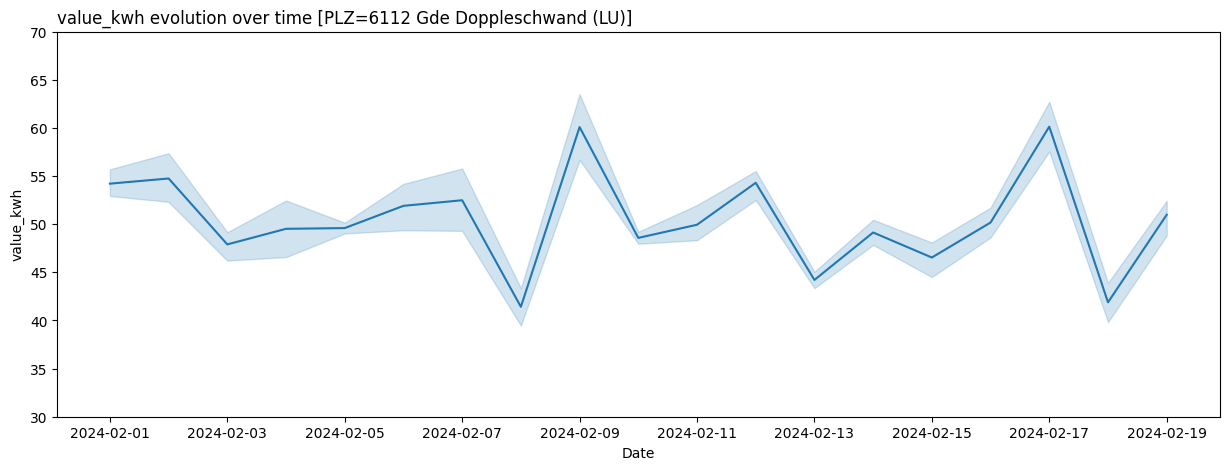

In [144]:
# Set the width and height of the figure
plt.figure(figsize=(15,5))

# Line chart showing how *value_kwh* evolved over time
sns.lineplot(data=sf_data, x='Date', y='value_kwh', markers=True, dashes=False, legend='auto')

# set a diagram title
plt.title("value_kwh evolution over time [PLZ=6112 Gde Doppleschwand (LU)]", loc = 'left')

# control y axe limits
plt.ylim(30, 70)

plt.show()

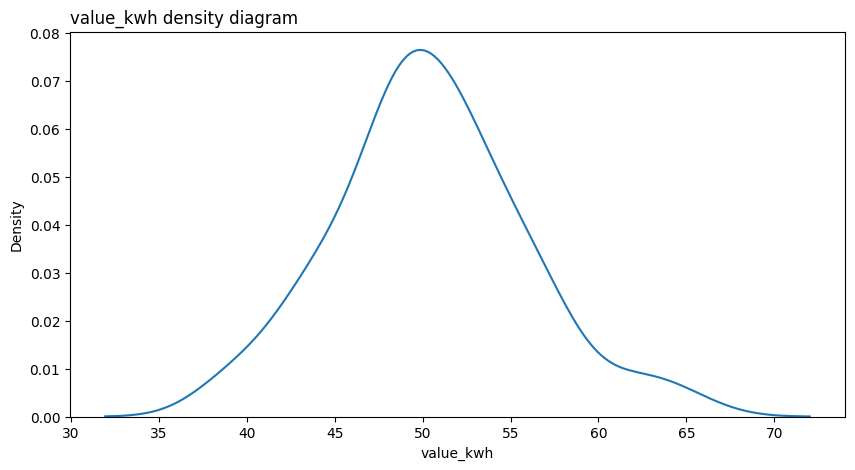

In [149]:
# set plot figure size
plt.figure(figsize=(10,5))

# Density diagram
sns.kdeplot(data=sf_data, x="value_kwh")

# Histgram
# sns.histplot(data=sf_data, x="value_kwh", bins=20)

# plot a diagram title
plt.title("value_kwh density diagram", loc = 'left')

plt.show()

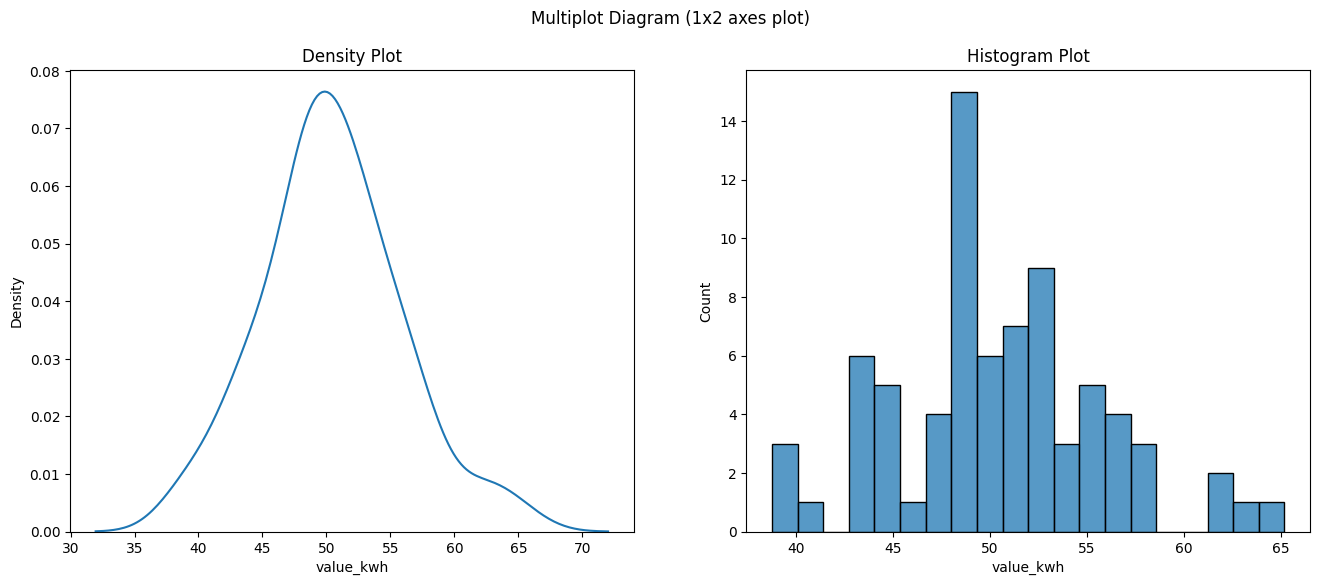

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Multiplot Diagram (1x2 axes plot)')

sns.kdeplot(ax=axes[0], data=sf_data, x="value_kwh").set(title='Density Plot')
sns.histplot(ax=axes[1], data=sf_data, x="value_kwh", bins=20).set(title='Histogram Plot')

plt.show()
